# Signal Decomposition and Fourier Transforms

In [187]:
import time
from math import log, exp, e

from matplotlib import pyplot as plt
from IPython.display import clear_output

import numpy as np
from numpy import pi, sin, cos, linspace
from scipy.fftpack import fft, fftfreq

import ipywidgets

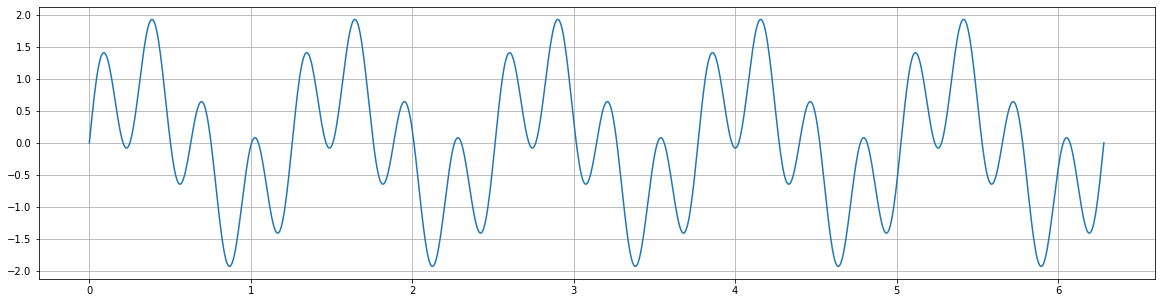

In [188]:
def f(x):
    return sin(5*x) + sin(20*x)

t = linspace(0, pi * 2, 1024)
f_t = f(t)

plt.figure(figsize=(20, 5))
plt.plot(t, f_t)
plt.grid()
plt.show()

In [197]:
n_fft = 1024
fourier_coefs = fft(f_t, n_fft)
frequencies = fftfreq(n_fft, 2 * pi /  n_fft)
decomposition = 0

data = []
for i, coef in enumerate(fourier_coefs):
    sinewave = (1. / len(t)) * \
        (
            coef.real * cos(frequencies[i] * 2 * pi * t) - \
            coef.imag * sin(frequencies[i] * 2 * pi * t)
        )
    decomposition += sinewave
    data.append(decomposition.copy())

@ipywidgets.widgets.interact(i=(0, len(data) - 1, 1))
def fourier_approximation(i=0):
    _, axes = plt.subplots(2, 1, figsize=(15, 10))
    axes = axes.flatten()

    axes[0].plot(t, f_t, label='Original Signal', c='green')
    axes[0].plot(t, data[i], c='red', label=f'Decomposition. {i} freqs')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Amplitude')
    axes[1].plot(t, fourier_coefs, c='blue', label='Frequencies')
    axes[1].plot(t[i], fourier_coefs[i], 'ro', label='')
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Real value')
    for a in axes:
        a.legend()
        a.grid()
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=1023), Output()), _dom_classes=('widget-interact…